In [1450]:
import numpy as np
import matplotlib.pyplot as plt

In [1558]:
run TP1920.py


In [1559]:
# Converter e definir as imagens
#resizeImageAndConvert()

In [1560]:
# Ler das imagens para uma matriz 'X' e um array 'lista'
X, lista, size = readImages()
size

48

In [1561]:
X[1].shape

(65025,)

In [1562]:
X.shape


(48, 65025)

In [1563]:
# Obter os vectores pp de acordo com um certo nivel de confianca
k, eigenvalues, eigenvectors, phi, mean, variance = pca(X, 1)
eigenvalues

Número de vectores pp a usar: 47


array([1.00869099e+09, 6.19188595e+08, 4.35779250e+08, 3.44530890e+08,
       2.26068203e+08, 1.31465245e+08, 1.09521515e+08, 8.11303696e+07,
       6.76638661e+07, 5.63355374e+07, 5.18214455e+07, 5.11439369e+07,
       4.72851992e+07, 4.12271639e+07, 3.75110815e+07, 3.21917090e+07,
       3.17179961e+07, 2.83533316e+07, 2.69554564e+07, 2.57687866e+07,
       2.30993236e+07, 2.09821907e+07, 1.96553591e+07, 1.91886680e+07,
       1.82429692e+07, 1.68259475e+07, 1.58000295e+07, 1.50220309e+07,
       1.40354211e+07, 1.35912543e+07, 1.23987780e+07, 1.16291114e+07,
       1.11702623e+07, 1.03194000e+07, 9.50276006e+06, 8.87648265e+06,
       8.70859376e+06, 8.60815525e+06, 8.24206338e+06, 7.73722020e+06,
       7.61733886e+06, 6.94365092e+06, 6.78659052e+06, 5.14986980e+06,
       4.87394844e+06, 4.05670949e+06, 3.90457562e+06, 1.20451912e-22])

Número de vectores pp a usar: 47


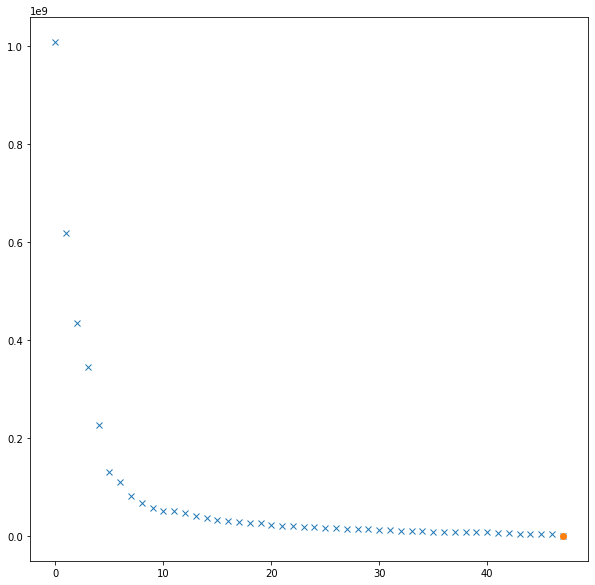

In [1564]:
# Obter os vectores pp de acordo com um certo nivel de confianca
k, eigenvalues, eigenvectors, phi, mean, variance = pca(X, 1)
# Alterar nome da variável
ponto=eigenvalues
# Obter o gráfico do cotovelo
plt.figure(figsize=(10,10))
t = np.arange(0, size, 1)
plt.plot(t, eigenvalues, 'x')
#plt.plot(np.argmin(ponto), eigenvalues[np.argmin(ponto)], 'o')
plt.plot(k, eigenvalues[k], 'o')
plt.show()

In [1565]:
eigenvectors.T[0]

array([-0.00064952, -0.00067356, -0.00066299, ..., -0.00041102,
       -0.00040529, -0.00027831])

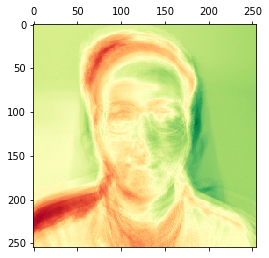

In [1566]:
# Exemplo de uma eigenface do dataset
display(plt.matshow(np.reshape(eigenvectors.T[0], (255,255)), cmap=plt.cm.RdYlGn))

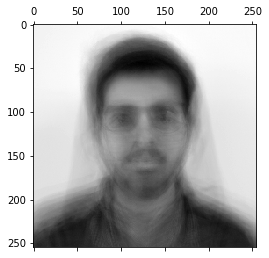

In [1567]:
# Exemplo da "cara média" do dataset
display(plt.matshow(np.reshape(mean, (255,255)), cmap='gray'))

In [1568]:
# Obter os coeficientes das projeccoes das eigenfaces
coef_proj = coefProj(phi, eigenvectors, X.shape[0])
coef_proj

[array([-5.06364161e+03,  4.82822923e+02,  5.86789818e+03, -2.01231563e+03,
        -9.90718524e+02,  2.09359263e+03, -1.10367096e+02,  6.09418220e+02,
        -5.92875109e+02,  3.53969926e+03, -1.50140168e+03,  3.78218633e+02,
        -8.94377654e+02,  2.04511158e+02, -2.10174748e+03,  9.87769969e+02,
        -4.61346039e+02, -4.80505218e+02, -1.49891966e+03,  1.10525960e+03,
         9.18151818e+02, -7.06461903e+01, -4.80618605e+02, -1.99066657e+02,
        -3.67351690e+02,  3.89579698e+02,  4.32688523e+02,  2.73991753e+02,
        -5.95866030e+02, -2.80437593e+02, -1.06197737e+03,  4.60683042e+02,
         3.34044180e+01,  3.03815581e+01,  2.16703436e+02, -1.02058754e+02,
        -5.50143098e+01, -7.12548015e+01, -1.28705310e+02, -2.37390775e+01,
        -7.47146719e+01,  5.30973514e+01,  1.74568394e+01,  5.33856397e+00,
         1.54868815e+00,  7.31179121e+00, -1.84343071e+01]),
 array([ 6023.28112691,   749.64226173,  1660.50609709,   762.64246191,
        -2201.26886661,   663.0

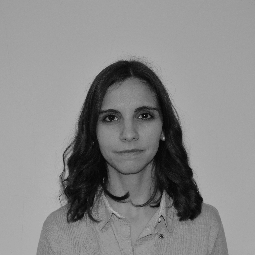

In [1630]:
# Imagem para teste
input_img = Image.open('TestSet/elisa_normal.gif').convert('L')
input_img

In [1631]:
# Teste do reconhecimento
dist, test_coef_proj = testar(input_img, mean, eigenvectors, eigenvalues, X.shape[0], coef_proj, 'euclidian')
image = 0
if np.size(dist) > 0 : 
    image = lista[np.argmin(dist)]
image

Falhou no reconhecimento.


0

In [989]:
coef_proj = np.reshape(coef_proj, (eigenvectors.shape[1], size))
#distance = np.sum( np.divide((coef_proj[:,4]-test_coef_proj)**2, eigenvalues[:eigenvectors.shape[1]]) )
#distance

In [990]:
def mahalanobis(x, y, eigenvalues, k):
    if x.shape[0] != y.shape[0]:
        return (-1)
    N = x.shape[1]
    distance=[0]*N
    for i in range(N):
        distance[i] = [np.sum(np.divide((x[:,i]-y)**2, eigenvalues[:k]))]
    return distance

In [118]:
coef_proj = np.reshape(coef_proj, (eigenvectors.shape[1], size))
dist = mahalanobis(coef_proj, test_coef_proj, eigenvalues, eigenvectors.shape[1])
distanceMahalanobis = np.sum(dist)
distanceMahalanobis

AttributeError: 'list' object has no attribute 'shape'

In [186]:
# Conclusoes: nao consegue reconhecer quando tem uma luz de lado. Caso contrario, faz bem o reconhecimento.